In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
X = pd.read_csv('weightedX.csv')
Y = pd.read_csv('weightedY.csv')

In [3]:
plt.style.use('seaborn')

In [5]:
print(X.shape)
print(Y.shape)

(99, 1)
(99, 1)


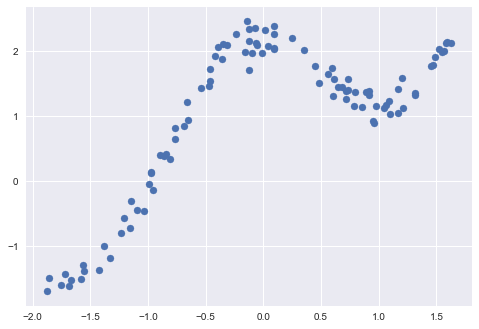

In [6]:
# Normailze
u = X.mean()
std = X.std()
X = (X-u)/std

# Visualize
plt.scatter(X,Y)
plt.show()


In [7]:
def getWeightMatrix(query_point, X, tau):
    M = X.shape[0]
    W = np.mat(np.eye(M))
    
    for i in range(M):
        xi = X[i]
        x = query_point
        W[i,i] = np.exp(np.dot((xi-x),(xi-x).T)/(-2*tau*tau))
        
    return W

In [8]:
X = np.mat(X)
Y = np.mat(Y)
M = X.shape[0]

W = getWeightMatrix(-1,X,0.5)
print(W.shape)
print(W)

(99, 99)
[[4.35429051e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.32889617e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.32581012e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.29085285e-01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  5.90271836e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 5.50591432e-05]]


In [9]:
# Make Prediction
def predict(X,Y,query_X,tau):
    ones = np.ones((M,1))
    X_ = np.hstack((X,ones))
    
    qx = np.mat([query_X,1])

    W = getWeightMatrix(qx,X_,tau)
    
    theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    pred = np.dot(qx,theta)
    return theta, pred

In [15]:
theta, pred = predict(X,Y,1,1)
print(theta.shape)
print(pred.shape)

(2, 1)
(1, 1)


In [11]:
def plotPrediction(tau):
    X_text = np.linspace(-2,2,50)
    Y_test = []
    
    for xq in X_text:
        theta, pred = predict(X,Y,xq,tau)
        Y_test.append(pred[0][0])
        
    Y_test = np.array(Y_test)
    
    XO = np.array(X)
    YO = np.array(Y)
    
    plt.title("Tau/Bandwidth Param : %.2f"%tau)
    plt.scatter(XO,YO)
    plt.scatter(X_text,Y_test, color='red')
    plt.show()

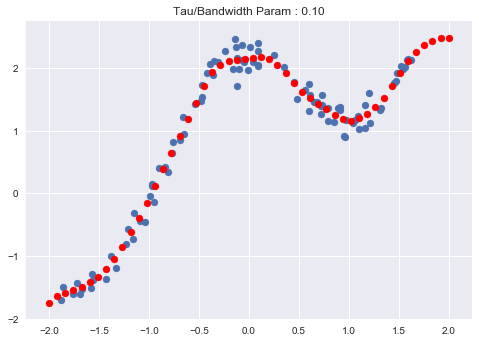

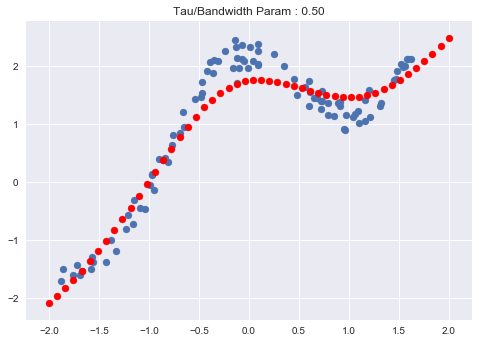

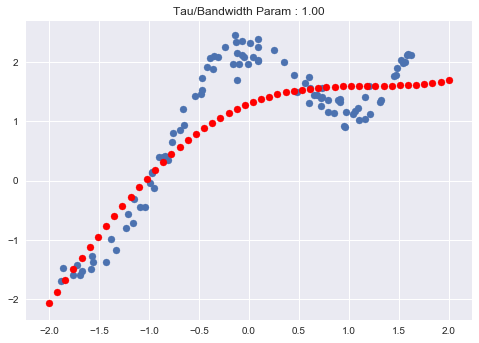

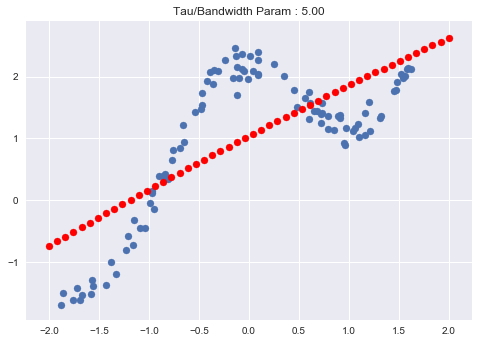

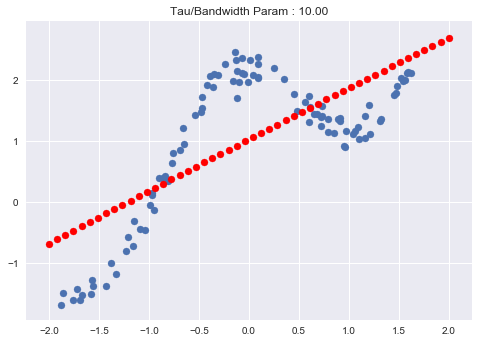

In [12]:
taus = [0.1, 0.5, 1, 5, 10]
for t in taus:
    plotPrediction(t)

In [13]:
a = np.eye(5)
print(a)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
